In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import sklearn
import keras
import seaborn as sb

In [ ]:
data= pd.read_csv("HR.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [ ]:
#deleting non unique rows
trun_data= data.drop_duplicates(keep='first')
trun_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
## number of rows deleted are
14999-11991

3008

In [ ]:
##converting categorial varibale like sales and salary to numeric variable based on ranking factor
##salary are given ranks, rank 1 means highest and higher rank means lowest salary
##sales are assigned unique discrete numeric variable

In [ ]:
#converting categorical salary data to numerical
trun_data['salary'].replace(['low','medium','high'],[3,2,1],inplace=True)
trun_data['salary']

<ipython-input-9-8af9c3410df6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trun_data['salary'].replace(['low','medium','high'],[3,2,1],inplace=True)


0        3
1        2
2        2
3        3
4        3
        ..
11995    1
11996    1
11997    1
11998    1
11999    3
Name: salary, Length: 11991, dtype: int64

In [ ]:
#converting sales data to numnerical
dicts={}
for x in trun_data['sales']:
  if x not in dicts:dicts[x]=1
dicts

{'sales': 1,
 'accounting': 1,
 'hr': 1,
 'technical': 1,
 'support': 1,
 'management': 1,
 'IT': 1,
 'product_mng': 1,
 'marketing': 1,
 'RandD': 1}

In [ ]:
trun_data['sales'].replace(['sales','accounting','hr','technical','support','management','IT','product_mng','marketing','RandD'],[1,2,3,4,5,6,7,8,9,10],inplace=True)
trun_data['sales']

<ipython-input-11-0b6c938446b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trun_data['sales'].replace(['sales','accounting','hr','technical','support','management','IT','product_mng','marketing','RandD'],[1,2,3,4,5,6,7,8,9,10],inplace=True)


0        1
1        1
2        1
3        1
4        1
        ..
11995    6
11996    6
11997    6
11998    9
11999    7
Name: sales, Length: 11991, dtype: int64

In [ ]:
trun_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,1,3
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,3
4,0.37,0.52,2,159,3,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,6,1
11996,0.74,0.95,5,266,10,0,0,1,6,1
11997,0.85,0.54,3,185,10,0,0,1,6,1
11998,0.33,0.65,3,172,10,0,0,1,9,1


In [ ]:
trun_data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.005716,-0.029241
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.009266,0.015775
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.005870,0.000502
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,-0.000095,0.000551
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,0.003698,-0.038164
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.010891,0.000058
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.023835,0.118882
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,0.017525,-0.087851
sales,0.005716,0.009266,0.005870,-0.000095,0.003698,0.010891,-0.023835,0.017525,1.000000,-0.016557
salary,-0.029241,0.015775,0.000502,0.000551,-0.038164,0.000058,0.118882,-0.087851,-0.016557,1.000000


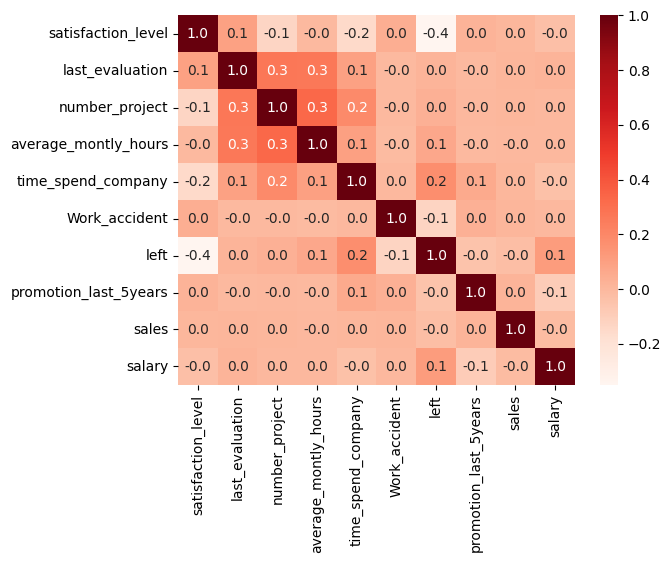

In [ ]:
dataplot = sb.heatmap(trun_data.corr(), cmap="Reds", annot=True, fmt='.1f')

Pairwise relaition

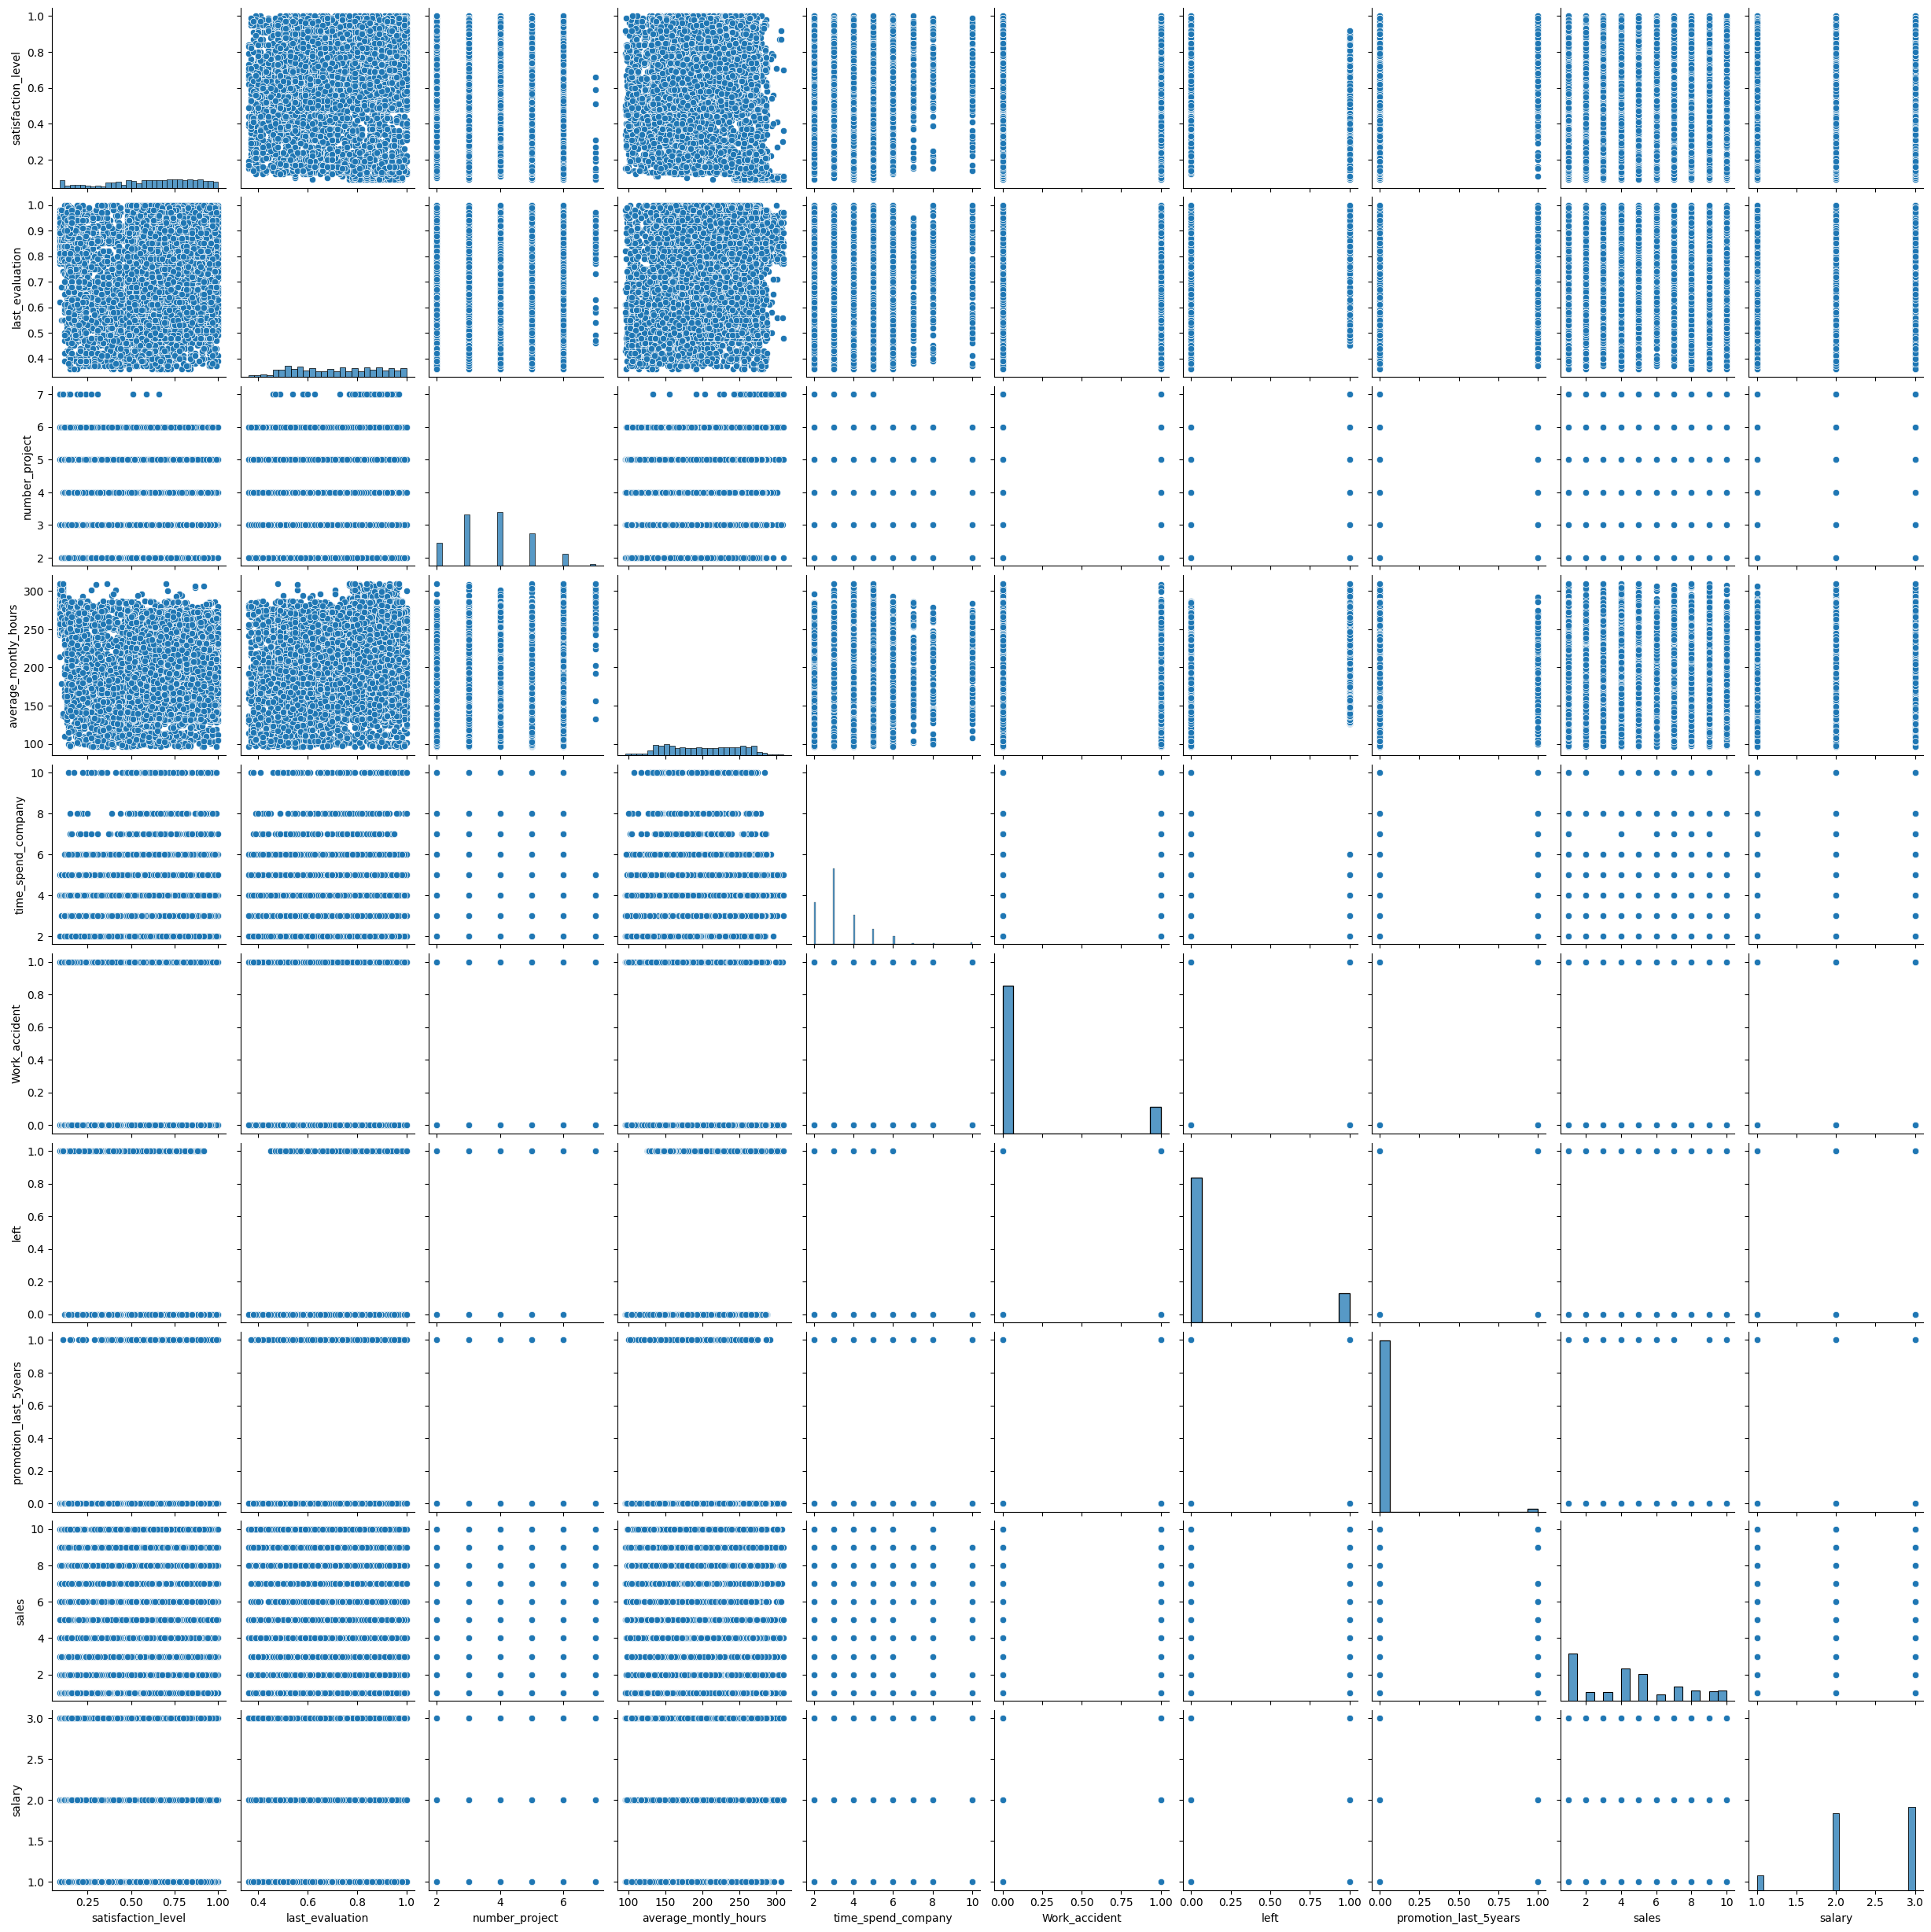

In [ ]:
sb.pairplot(trun_data)

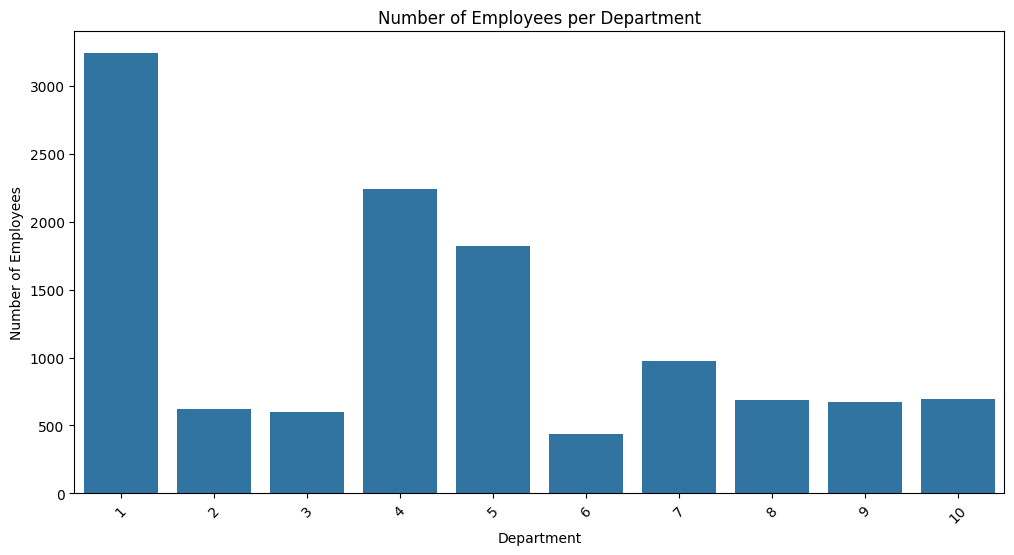

In [ ]:
plt.figure(figsize=(12, 6))
sb.countplot(x='sales', data=trun_data)
plt.title('Number of Employees per Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-422bdf534c38>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  countplot.set_xticklabels([salary_labels[int(item.get_text())] for item in countplot.get_xticklabels()])


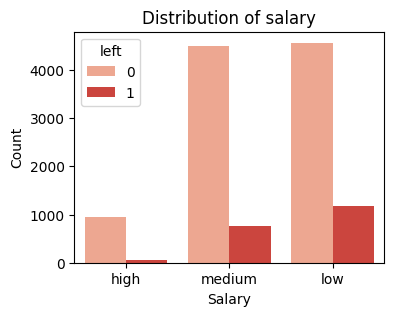

left,0,1,All,proportion,left%,left_rate
salary,,,,,,
1,942,48,990,8.3,1.2,4.8
2,4492,769,5261,43.9,19.3,14.6
3,4566,1174,5740,47.9,29.5,20.5
All,10000,1991,11991,100.0,50.0,16.6


In [ ]:
# Create a mapping of numerical values to categorical labels
salary_labels = {1: 'high', 2: 'medium', 3: 'low'}

# Plotting
plt.figure(figsize=(4, 3))
countplot = sb.countplot(x='salary', hue='left', palette='Reds', data=trun_data)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of salary')

# Set x-axis labels to the categorical labels
countplot.set_xticklabels([salary_labels[int(item.get_text())] for item in countplot.get_xticklabels()])

# Display the plot
plt.show()

salary = pd.crosstab(trun_data.salary,trun_data.left , margins=True)
salary['proportion'] = (salary.iloc[:,2]*100/len(trun_data)).round(1)
salary['left%'] = (salary.iloc[:,1]*100/(salary.iloc[:,1].sum())).round(1)
salary['left_rate'] = (salary.iloc[:,1]*100/(salary.iloc[:,2])).round(1)
salary.sort_values('left%' , ascending=True)

Relation between promotion and resignation rates

**Noted - Lower promotion tend to higher resignation**

left,0,1,All,proportion,left%,left_rate
promotion_last_5years,,,,,,
0,9805,1983,11788,98.3,49.8,16.8
1,195,8,203,1.7,0.2,3.9
All,10000,1991,11991,100.0,50.0,16.6


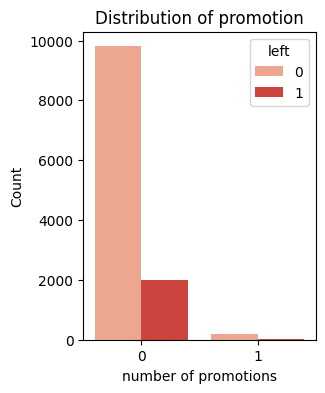

In [ ]:
plt.figure(figsize=(3,4))
sb.countplot(x = 'promotion_last_5years' ,hue ='left' ,palette = 'Reds' , data= trun_data);
plt.xlabel('number of promotions')
plt.ylabel("Count")
plt.title("Distribution of promotion");

promotion = pd.crosstab(trun_data.promotion_last_5years,trun_data.left , margins=True)
promotion['proportion'] = (promotion.iloc[:,2]*100/len(trun_data)).round(1)
promotion['left%'] = (promotion.iloc[:,1]*100/(promotion.iloc[:,1].sum())).round(1)
promotion['left_rate'] = (promotion.iloc[:,1]*100/(promotion.iloc[:,2])).round(1)
promotion

**Work Accident and resignation relationship**

left,0,1,All,proportion,left%,left_rate
Work_accident,,,,,,
0,8255,1886,10141,84.6,47.4,18.6
1,1745,105,1850,15.4,2.6,5.7
All,10000,1991,11991,100.0,50.0,16.6


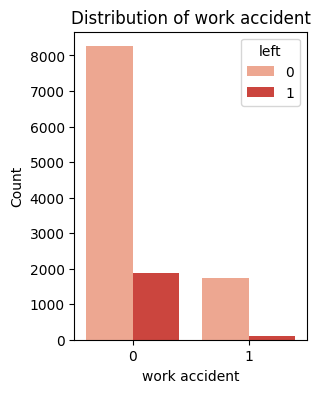

In [ ]:
plt.figure(figsize=(3,4))
sb.countplot(x = 'Work_accident' ,hue ='left' ,palette = "Reds" , data= trun_data);
plt.xlabel('work accident')
plt.ylabel("Count")
plt.title("Distribution of work accident");

accident = pd.crosstab(trun_data.Work_accident,trun_data.left , margins=True)
accident['proportion'] = (accident.iloc[:,2]*100/len(trun_data)).round(1)
accident['left%'] = (accident.iloc[:,1]*100/(accident.iloc[:,1].sum())).round(1)
accident['left_rate'] = (accident.iloc[:,1]*100/(accident.iloc[:,2])).round(1)
accident

**number of project and resignation relationship**


left,0,1,All,proportion,left%,left_rate
number_project,,,,,,
2,725,857,1582,13.2,21.5,54.2
3,3482,38,3520,29.4,1.0,1.1
4,3448,237,3685,30.7,6.0,6.4
5,1890,343,2233,18.6,8.6,15.4
6,455,371,826,6.9,9.3,44.9
7,0,145,145,1.2,3.6,100.0
All,10000,1991,11991,100.0,50.0,16.6


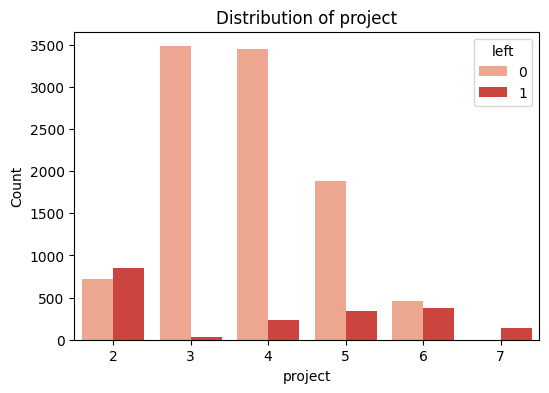

In [ ]:
plt.figure(figsize=(6,4))
sb.countplot(x = 'number_project' ,hue ='left' ,palette = "Reds" , data= trun_data);
plt.xlabel('project')
plt.ylabel("Count")
plt.title("Distribution of project");

project = pd.crosstab(trun_data.number_project,trun_data.left , margins=True)
project['proportion'] = (project.iloc[:,2]*100/len(trun_data)).round(1)
project['left%'] = (project.iloc[:,1]*100/(project.iloc[:,1].sum())).round(1)
project['left_rate'] = (project.iloc[:,1]*100/(project.iloc[:,2])).round(1)
project

**wrk experience and resignation relationship**

left,0,1,All,proportion,left%,left_rate
time_spend_company,,,,,,
2,2879,31,2910,24.3,0.8,1.1
3,4316,874,5190,43.3,21.9,16.8
4,1510,495,2005,16.7,12.4,24.7
5,580,482,1062,8.9,12.1,45.4
6,433,109,542,4.5,2.7,20.1
7,94,0,94,0.8,0.0,0.0
8,81,0,81,0.7,0.0,0.0
10,107,0,107,0.9,0.0,0.0
All,10000,1991,11991,100.0,50.0,16.6


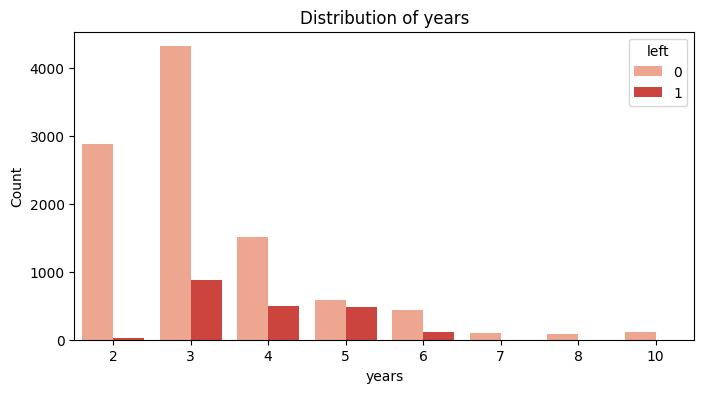

In [ ]:
plt.figure(figsize=(8,4))
sb.countplot(x = 'time_spend_company' ,hue ='left' ,palette = "Reds" , data= trun_data);
plt.xlabel('years')
plt.ylabel("Count")
plt.title("Distribution of years");

years = pd.crosstab(trun_data.time_spend_company,trun_data.left , margins=True)
years['proportion'] = (years.iloc[:,2]*100/len(trun_data)).round(1)
years['left%'] = (years.iloc[:,1]*100/(years.iloc[:,1].sum())).round(1)
years['left_rate'] = (years.iloc[:,1]*100/(years.iloc[:,2])).round(1)
years

**Splitting the dataset**

In [ ]:
trun_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,4.361438,2.39613
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,2.826709,0.63590
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,7.000000,3.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.00000


In [ ]:
y= trun_data['left']
X=trun_data.drop(['left'],axis=1)

In [ ]:
X.shape,y.shape

((11991, 9), (11991,))

In [ ]:
# Perform Standard Scaling
# Can use Standard Scaler
X = ((X-X.mean())/X.std())

In [ ]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,-1.035625,-1.108944,-1.549857,-0.892171,-0.274279,-0.427098,-0.131223,-1.189170,0.949630
1,0.706608,0.851344,1.029151,1.262656,1.980954,-0.427098,-0.131223,-1.189170,-0.622945
2,-2.155631,0.970150,2.748490,1.467878,0.477465,-0.427098,-0.131223,-1.189170,-0.622945
3,0.374754,0.910747,1.029151,0.462292,1.229209,-0.427098,-0.131223,-1.189170,0.949630
4,-1.077107,-1.168347,-1.549857,-0.851126,-0.274279,-0.427098,-0.131223,-1.189170,0.949630
...,...,...,...,...,...,...,...,...,...
11995,1.121425,-0.990139,-0.690187,1.201090,4.987931,2.341189,7.619982,0.579671,-2.195519
11996,0.457717,1.385968,1.029151,1.344745,4.987931,-0.427098,7.619982,0.579671,-2.195519
11997,0.914016,-1.049542,-0.690187,-0.317550,4.987931,-0.427098,7.619982,0.579671,-2.195519
11998,-1.243033,-0.396112,-0.690187,-0.584338,4.987931,-0.427098,7.619982,1.640976,-2.195519


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8993, 9), (2998, 9), (8993,), (2998,))

**MODEL BUILDING**


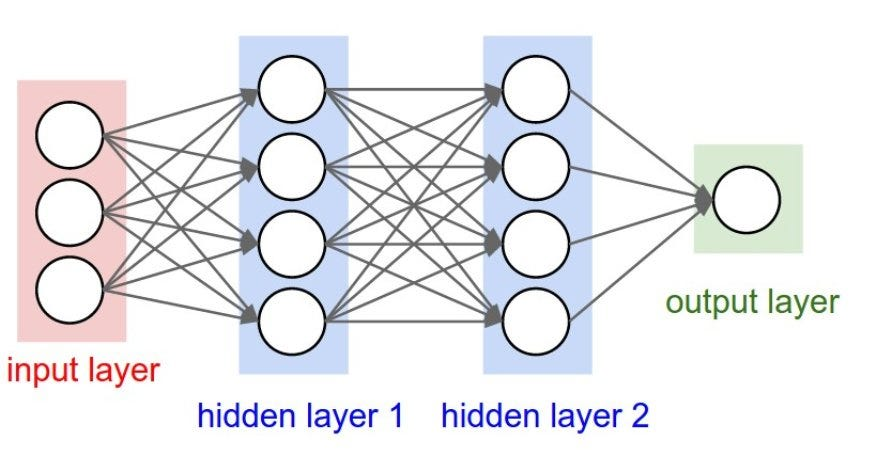

In [ ]:
## first build simple classifier with neural network
##then add autoencoder (non variational and non over) to model
## notedown model accuracy before and after
## save model using pickle
## export model to streamlit

In [ ]:
import tensorflow as tf
import keras

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_dim=9,activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.3)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


197/197 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7925 - val_loss: 0.0000e+00 - val_accuracy: 0.8373
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


197/197 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8324 - val_loss: 0.0000e+00 - val_accuracy: 0.8373
Epoch 3/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8324 - val_loss: 0.0000e+00 - val_accuracy: 0.8373
Epoch 4/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8324 - val_loss: 0.0000e+00 - val_accuracy: 0.8373
Epoch 5/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8324 - val_loss: 0.0000e+00 - val_accuracy: 0.8373
Epoch 6/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8324 - val_loss: 0.0000e+00 - val_accuracy: 0.8373
Epoch 7/50
197/197 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8324 - val_loss: 0.0000e+00 - val_accuracy: 0.8373
Epoch 8/50
197/197 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.8324 - val_l

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test ,batch_size=32)

94/94 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.8342


In [ ]:
accuracy*100


83.42227935791016

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

94/94 [==============================] - 0s 1ms/step


array([[2501,    0],
       [ 497,    0]])

In [ ]:
model.save('modelnn')

Applying Autoencoder along with model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the autoencoder architecture
input_dim = X_train.shape[1]
encoding_dim = 4  # Dimension of the encoded representation

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder part
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder part
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
225/225 [==============================] - 1s 3ms/step - loss: 1.1747 - val_loss: 1.1768
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 1.0242 - val_loss: 1.0481
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 0.9228 - val_loss: 0.9723
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.8670 - val_loss: 0.9301
Epoch 5/50
225/225 [==============================] - 1s 3ms/step - loss: 0.8332 - val_loss: 0.9019
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.8084 - val_loss: 0.8813
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.7906 - val_loss: 0.8672
Epoch 8/50
225/225 [==============================] - 0s 2ms/step - loss: 0.7779 - val_loss: 0.8565
Epoch 9/50
225/225 [==============================] - 0s 2ms/step - loss: 0.7676 - val_loss: 0.8470
Epoch 10/50
225/225 [==============================] - 0s 2ms/step - loss: 0.7582 - val_loss: 0.8379

In [ ]:
# Define the encoder model
encoder = Model(inputs=input_layer, outputs=encoded)

# Transform the training and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [ ]:
# Define the classification model
classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=encoding_dim, activation='relu'),  # First hidden layer with input dimension
    tf.keras.layers.Dense(32, activation='relu'),                         # Second hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')                        # Output layer for binary classification
])

# Compile the classification model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the classification model
classifier.fit(X_train_encoded, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the classification model
loss, accuracy = classifier.evaluate(X_test_encoded, y_test, verbose=0)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/50
225/225 [==============================] - 2s 5ms/step - loss: 0.3969 - accuracy: 0.8443 - val_loss: 0.2927 - val_accuracy: 0.8938
Epoch 2/50
225/225 [==============================] - 1s 4ms/step - loss: 0.2649 - accuracy: 0.9055 - val_loss: 0.2302 - val_accuracy: 0.9127
Epoch 3/50
225/225 [==============================] - 1s 4ms/step - loss: 0.2337 - accuracy: 0.9235 - val_loss: 0.2051 - val_accuracy: 0.9400
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.2217 - accuracy: 0.9274 - val_loss: 0.2001 - val_accuracy: 0.9322
Epoch 5/50
225/225 [==============================] - 1s 2ms/step - loss: 0.2133 - accuracy: 0.9323 - val_loss: 0.2095 - val_accuracy: 0.9372
Epoch 6/50
225/225 [==============================] - 1s 2ms/step - loss: 0.2103 - accuracy: 0.9338 - val_loss: 0.2008 - val_accuracy: 0.9394
Epoch 7/50
225/225 [==============================] - 1s 2ms/step - loss: 0.2069 - accuracy: 0.9343 - val_loss: 0.1914 - val_accuracy: 0.9405
Epoch 

In [ ]:
# Predict the classes for the test dataset
y_pred_prob = classifier.predict(X_test_encoded)
y_pred = np.round(y_pred_prob).astype(int)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 2ms/step
Confusion Matrix:
[[2393  108]
 [  79  418]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2501
           1       0.79      0.84      0.82       497

    accuracy                           0.94      2998
   macro avg       0.88      0.90      0.89      2998
weighted avg       0.94      0.94      0.94      2998



In [ ]:
classifier.save('encodmodelnn')

In [ ]:
from tensorflow.keras.models import Model, Sequential

In [ ]:
# Function to train the model with autoencoder and capture history
def train_model_with_autoencoder():
    # Define the autoencoder architecture
    input_dim = X_train.shape[1]
    encoding_dim = 4  # Dimension of the encoded representation

    # Input layer
    input_layer = Input(shape=(input_dim,))

    # Encoder part
    encoded = Dense(encoding_dim, activation='relu')(input_layer)

    # Decoder part
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=decoded)

    # Compile the autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder
    autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.2)

    # Define the encoder model
    encoder = Model(inputs=input_layer, outputs=encoded)

    # Transform the training and test data
    x_train_encoded = encoder.predict(X_train)
    X_test_encoded = encoder.predict(X_test)

    # Define the classification model
    classifier = Sequential([
        Dense(64, input_dim=encoding_dim, activation='relu'),  # First hidden layer with input dimension
        Dense(32, activation='relu'),                         # Second hidden layer
        Dense(1, activation='sigmoid')                        # Output layer for binary classification
    ])

    # Compile the classification model
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the classification model and capture history
    history_with_autoencoder = classifier.fit(x_train_encoded, y_train, epochs=100, batch_size=32, validation_split=0.2)

    return history_with_autoencoder


In [ ]:
# Function to train the model without autoencoder and capture history
def train_model_without_autoencoder():
    # Define the classification model
    classifier = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with input dimension
        Dense(32, activation='relu'),                             # Second hidden layer
        Dense(1, activation='sigmoid')                            # Output layer for binary classification
    ])

    # Compile the classification model
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the classification model and capture history
    history_without_autoencoder = classifier.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

    return history_without_autoencoder


Epoch 1/50
225/225 [==============================] - 1s 3ms/step - loss: 1.1846 - val_loss: 1.1918
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 1.0318 - val_loss: 1.0636
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 0.9288 - val_loss: 0.9861
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 0.8689 - val_loss: 0.9408
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 0.8337 - val_loss: 0.9135
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.8117 - val_loss: 0.8952
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.7959 - val_loss: 0.8812
Epoch 8/50
225/225 [==============================] - 0s 2ms/step - loss: 0.7836 - val_loss: 0.8701
Epoch 9/50
225/225 [==============================] - 0s 2ms/step - loss: 0.7732 - val_loss: 0.8605
Epoch 10/50
225/225 [==============================] - 0s 2ms/step - loss: 0.7635 - val_loss: 0.8510

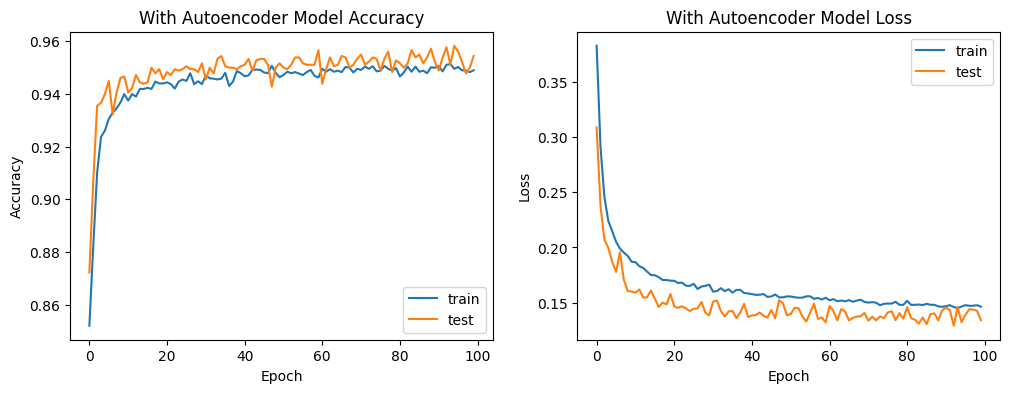

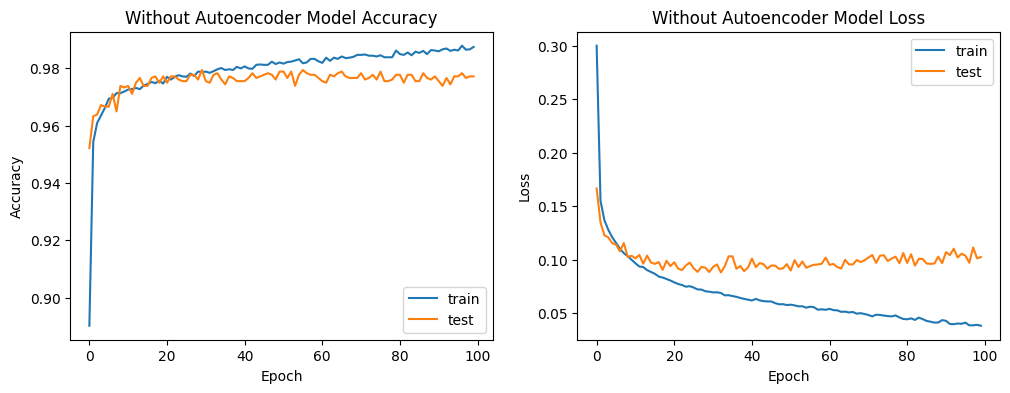

In [ ]:
import matplotlib.pyplot as plt

# Function to plot the training and validation accuracy and loss curves
def plot_history(history, title_prefix):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title_prefix} Model Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title_prefix} Model Loss')
    plt.legend()

    plt.show()

# Train models and capture histories
history_with_autoencoder = train_model_with_autoencoder()
history_without_autoencoder = train_model_without_autoencoder()

# Plot histories
plot_history(history_with_autoencoder, 'With Autoencoder')
plot_history(history_without_autoencoder, 'Without Autoencoder')


In [ ]:
#### changes to be made -   NN model is not working properly, should classify , fine tune it
### accuracy of autoencoder can be increased by adding substantial bais + variance in the data

#NN model fail point cause- Overfitting/ Generalised fit
#solution- flatten/ train less or gather more data



changing the dataset and adding rewards column with bias for rewards system

In [ ]:
def assign_reward_grade(row):
    if (row['last_evaluation'] >= 0.80 and
        row['number_project'] >= 5 and
        row['average_montly_hours'] >= 210 and
        row['time_spend_company'] >= 3):
        return 'A'
    elif (row['last_evaluation'] >= 0.65 and
          row['number_project'] >= 3 and
          row['average_montly_hours'] >= 175 and
          row['time_spend_company'] >= 2):
        return 'B'
    else:
        return 'C'


In [ ]:
import pandas as pd

# Load your dataset
rew_data = pd.read_csv('HR.csv')

# Apply the function to add the reward_grade column
rew_data['reward_grade'] = rew_data.apply(assign_reward_grade, axis=1)
rew_data


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,reward_grade
0,0.38,0.53,2,157,3,0,1,0,sales,low,C
1,0.80,0.86,5,262,6,0,1,0,sales,medium,A
2,0.11,0.88,7,272,4,0,1,0,sales,medium,A
3,0.72,0.87,5,223,5,0,1,0,sales,low,A
4,0.37,0.52,2,159,3,0,1,0,sales,low,C
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,C
14995,0.37,0.48,2,160,3,0,1,0,support,low,C
14996,0.37,0.53,2,143,3,0,1,0,support,low,C
14997,0.11,0.96,6,280,4,0,1,0,support,low,A


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the reward_grade column
rew_data['reward_grade'] = le.fit_transform(rew_data['reward_grade'])
rew_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,reward_grade
0,0.38,0.53,2,157,3,0,1,0,sales,low,2
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,2
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,2
14995,0.37,0.48,2,160,3,0,1,0,support,low,2
14996,0.37,0.53,2,143,3,0,1,0,support,low,2
14997,0.11,0.96,6,280,4,0,1,0,support,low,0


In [ ]:
rdata=rew_data[['last_evaluation','number_project','average_montly_hours','time_spend_company','reward_grade']]
rdata.shape

(14999, 5)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
Xr = rdata.drop('reward_grade', axis=1)
yr = rdata['reward_grade']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(Xr_train, yr_train)

# Make predictions
yr_pred = clf.predict(Xr_test)

# Evaluate the model
accuracy = accuracy_score(yr_test, yr_pred)
report = classification_report(yr_test, yr_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       470
           1       1.00      1.00      1.00      1489
           2       1.00      1.00      1.00      2541

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500

